<a href="https://colab.research.google.com/github/tsenga2/keio-quant-macro/blob/main/GrowthAccounting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
library(tidyverse)

install.packages('haven')
library(haven)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [12]:
pwt90 <- read_dta('https://www.rug.nl/ggdc/docs/pwt90.dta')

In [13]:
library(dplyr)

data <- pwt90 %>%
  filter(country %in% c("United Kingdom")) %>%
  select(year, countrycode, rgdpna, rkna, pop, emp, avh, labsh, rtfpna) %>%
  filter(year >= 1975,
         year <= 2015) %>%
  na.omit()

In [14]:
data <- data %>%
  mutate(alpha = 1 - labsh,
         y_n = rgdpna/emp,                                      # Y/N
         hours = emp*avh,                                       # L
         tfp_term = rtfpna^(1/(1-alpha)),                       # A^(1/(1-alpha)
         cap_term = (rkna/rgdpna)^(alpha/(1-alpha)),            # (K/Y)^(alpha/(1-alpha))
         lab_term = hours/pop) %>%                              # L/N
  arrange(year) %>%                                             # Order by year
  group_by(countrycode) %>%                                     # For each country calculate...
  mutate(alpha = 1 - labsh,
         y_n_shifted = 100*y_n / y_n[1],                                    
         tfp_term_shifted = (100*tfp_term / tfp_term[1]),                     
         cap_term_shifted = (100*cap_term / cap_term[1]),                     
         lab_term_shifted = (100*lab_term / lab_term[1])) %>%                    
  na.omit()

data <- data %>%
print(n = 10, width = Inf)

# A tibble: 40 × 19
# Groups:   countrycode [1]
    year countrycode   rgdpna     rkna   pop   emp   avh labsh rtfpna alpha
   <dbl> <chr>          <dbl>    <dbl> <dbl> <dbl> <dbl> <dbl>  <dbl> <dbl>
 1  1975 GBR          975608. 4805112.  56.2  24.8 1900. 0.603  0.693 0.397
 2  1976 GBR         1005152. 4929272.  56.2  24.7 1892. 0.603  0.708 0.397
 3  1977 GBR         1031256. 5045754.  56.2  24.7 1885. 0.603  0.717 0.397
 4  1978 GBR         1073847. 5171337   56.2  24.9 1875. 0.603  0.735 0.397
 5  1979 GBR         1113323  5303411   56.2  25.1 1842. 0.603  0.755 0.397
 6  1980 GBR         1089172. 5402248.  56.2  25.0 1820. 0.603  0.738 0.397
 7  1981 GBR         1079948. 5467772.  56.2  24.1 1801. 0.603  0.745 0.397
 8  1982 GBR         1102361. 5549436   56.3  23.7 1789. 0.603  0.763 0.397
 9  1983 GBR         1148680. 5644459   56.3  23.7 1793. 0.603  0.786 0.397
10  1984 GBR         1174645. 5767542   56.3  24.2 1790. 0.603  0.784 0.397
      y_n  hours tfp_term cap_term lab_t

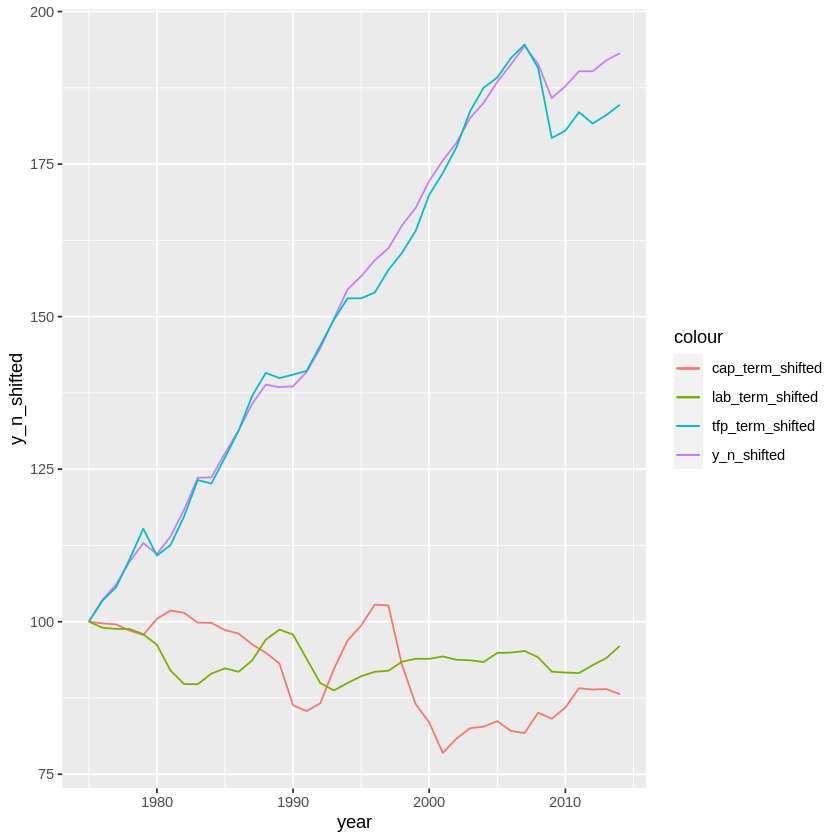

In [15]:
ggplot(data, aes(year)) + 
  geom_line(aes(y = y_n_shifted, colour = "y_n_shifted")) +   
  geom_line(aes(y = tfp_term_shifted, colour = "tfp_term_shifted")) +   
  geom_line(aes(y = cap_term_shifted, colour = "cap_term_shifted")) + 
  geom_line(aes(y = lab_term_shifted, colour = "lab_term_shifted"))